# Prediction using Supervised ML

# Predicts the percentage of an student based on number of study hours

In [19]:
#import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
#read data from url
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [21]:
df.shape

(25, 2)

In [22]:
#Describes the values of the table
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


VISUALIZING THE DATA

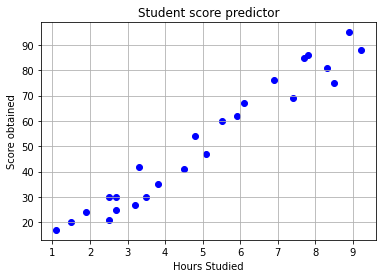

In [23]:
#plot a graph
plt.scatter(df.Hours,df.Scores,color="blue",marker="o")

plt.title('Student score predictor')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score obtained') 
plt.grid(True)
plt.show()

In [24]:
#dividing data into inputs and outputs
X = df.iloc[:,:1].values
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
y = df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [26]:
# Splitting data into training set and test set


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

TRAINING THE LINEAR REGRESSION MODEL

In [27]:
from sklearn import linear_model
regressor=linear_model.LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

MODEL EVALUVATION

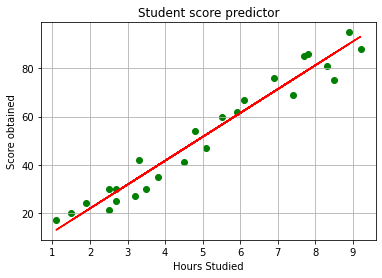

In [28]:
# Plotting regression line 
line = regressor.coef_*X+regressor.intercept_
# Plotting the line for the test data
plt.scatter(X, y, c='green')
plt.plot(X, line, c='red')
plt.title('Student score predictor')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score obtained') 
plt.grid(True)
plt.show()


In [29]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted Scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
display(df)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
#prediction of the data values using predict function
#if a student studies for 9.25 hrs/ day?
Hours=[[9.25]]
y_pred=regressor.predict(Hours)
print(y_pred)

[93.69173249]


MODEL EVALUATION

In [32]:
from sklearn import metrics

predictions = regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 4.183859899002982
